In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv("29-bankloan.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- ID: Customer ID
- Age : Customer Age
- Experience : Customer Experience
- Income : Income of the Customer
- ZipCode: Customer's residence zipcode
- Family : No of Family members of the customer
- CCAvg: Credit Card Average Score
- Education: Education of the customer
- Mortgage: Mortgage taken or not taken by the customer
- Personal Loan: 0 = No personal loan given , 1 = personal loan given
- Securities Account : Having or not having a Securities Account
- CD Account : Having or not having a CD Account
- Online : Having or not having online banking
- Credit Card : Having or not having a credit card

Dependent variable is Personal.Loan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.drop(columns=['ID','ZIP.Code'], axis=1, inplace=True)

In [6]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
len(df[df['Experience'] < 0])

52

In [8]:
df = df[df['Experience'] > 0]

In [9]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000
mean,45.826506,20.605899,73.870750,2.386112,1.935412,1.874846,56.844326,0.096887,0.104056,0.061450,0.598730,0.294961
std,11.155088,11.136704,46.112752,1.148222,1.745065,0.839329,102.009136,0.295833,0.305364,0.240179,0.490206,0.456072
min,25.000000,1.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,21.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.750000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.shape

(4882, 12)

In [11]:
for col in df.columns:
    print(col,"values : ", df[col].unique(), "\n")

Age values :  [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 52 64 26 63] 

Experience values :  [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34 38 40 33  4 42 43] 

Income values :  [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 118  64 161  94  15  74  30  38   9
  92  61  73  70 149  98 128  31  58  54 124 163  24  79  23  13 138 171
 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89  28  75
 170 120  99 134 111  33 129 122 150 195 110 101 191 140 153 173 113 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218] 

Family values :  [4 

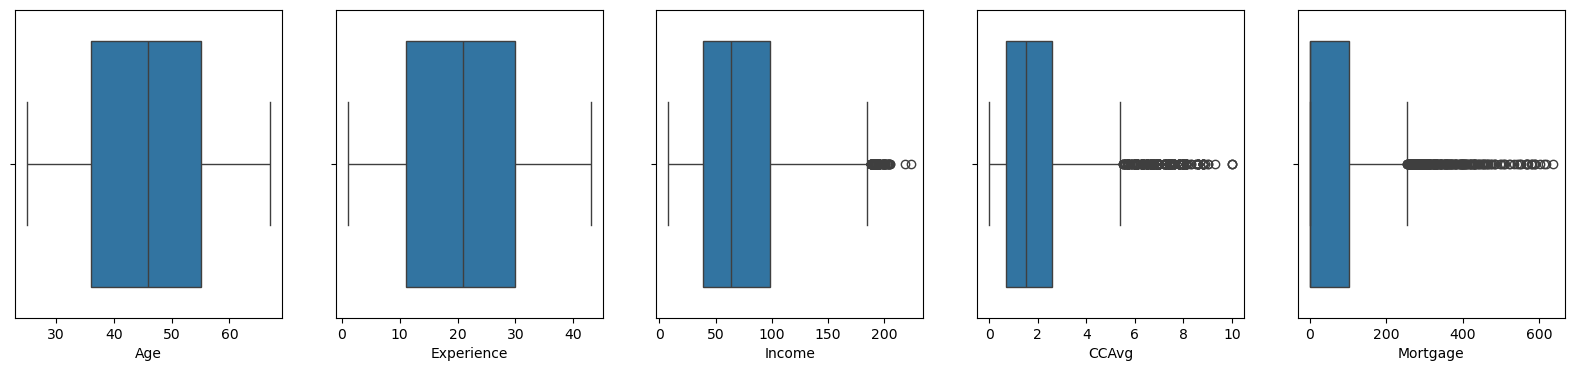

In [12]:
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
sns.boxplot(x=df['Age'])

plt.subplot(1,5,2)
sns.boxplot(x=df['Experience'])

plt.subplot(1,5,3)
sns.boxplot(x=df['Income'])

plt.subplot(1,5,4)
sns.boxplot(x=df['CCAvg'])

plt.subplot(1,5,5)
sns.boxplot(x=df['Mortgage'])

plt.show()

# Train Test Split

In [13]:
X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [19]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [100, 10 , 1, 0.1],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

cv = StratifiedKFold()

In [20]:
gridLogistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=cv, refit=True)

In [21]:
gridLogistic.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [22]:
gridLogistic.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'saga'}

In [23]:
logistic = LogisticRegression(penalty='l1', C=100, solver='saga')
logistic.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, penalty='l1', solver='saga')

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
y_pred = logistic.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score 0.9582309582309583
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1117
           1       0.80      0.67      0.73       104

    accuracy                           0.96      1221
   macro avg       0.89      0.83      0.86      1221
weighted avg       0.96      0.96      0.96      1221

Confusion Matrix:
 [[1100   17]
 [  34   70]]


# KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
param_grid ={
    'n_neighbors' : [3,4,5,10],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [29]:
gridKNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid, cv=cv, refit=True)

In [30]:
gridKNN.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 10]})

In [31]:
gridKNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [32]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score 0.9705159705159705
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1117
           1       0.94      0.70      0.80       104

    accuracy                           0.97      1221
   macro avg       0.95      0.85      0.89      1221
weighted avg       0.97      0.97      0.97      1221

Confusion Matrix:
 [[1112    5]
 [  31   73]]


# SVM Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

In [36]:
gridSVM = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=cv, scoring='accuracy', refit=True)

In [37]:
gridSVM.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [38]:
gridSVM.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [39]:
svm = SVC(C=10, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10)

In [40]:
y_pred = svm.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score 0.9836199836199836
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1117
           1       0.94      0.87      0.90       104

    accuracy                           0.98      1221
   macro avg       0.96      0.93      0.95      1221
weighted avg       0.98      0.98      0.98      1221

Confusion Matrix:
 [[1111    6]
 [  14   90]]


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,15,20,25,30,35,40,None],
    'max_features' : ['sqrt', 'log2', None]
}

In [43]:
gridTree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy',refit=True, verbose=3)

In [44]:
gridTree.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.973 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.948 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.945 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.926 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt;, score=0.969 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.970 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.929 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.917 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.936 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.922 total time=   0.0s
[CV 1/5]

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy', verbose=3)

In [45]:
gridTree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None}

In [46]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
y_pred = tree_model.predict(X_test)
print("Accuracy Score", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score 0.9901719901719902
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1117
           1       0.98      0.90      0.94       104

    accuracy                           0.99      1221
   macro avg       0.99      0.95      0.97      1221
weighted avg       0.99      0.99      0.99      1221

Confusion Matrix:
 [[1115    2]
 [  10   94]]


[Text(0.47115384615384615, 0.9166666666666666, 'Income <= 0.407\nentropy = 0.472\nsamples = 3661\nvalue = [3292, 369]'),
 Text(0.21153846153846154, 0.75, 'CCAvg <= 0.604\nentropy = 0.056\nsamples = 2655\nvalue = [2638, 17]'),
 Text(0.34134615384615385, 0.8333333333333333, 'True  '),
 Text(0.17307692307692307, 0.5833333333333334, 'entropy = 0.0\nsamples = 2513\nvalue = [2513, 0]'),
 Text(0.25, 0.5833333333333334, 'CD.Account <= 1.811\nentropy = 0.529\nsamples = 142\nvalue = [125, 17]'),
 Text(0.15384615384615385, 0.4166666666666667, 'CCAvg <= 1.012\nentropy = 0.407\nsamples = 135\nvalue = [124, 11]'),
 Text(0.07692307692307693, 0.25, 'Income <= 0.188\nentropy = 0.581\nsamples = 72\nvalue = [62, 10]'),
 Text(0.038461538461538464, 0.08333333333333333, 'entropy = 0.391\nsamples = 52\nvalue = [48, 4]'),
 Text(0.11538461538461539, 0.08333333333333333, 'entropy = 0.881\nsamples = 20\nvalue = [14, 6]'),
 Text(0.23076923076923078, 0.25, 'Mortgage <= 0.343\nentropy = 0.118\nsamples = 63\nvalue =

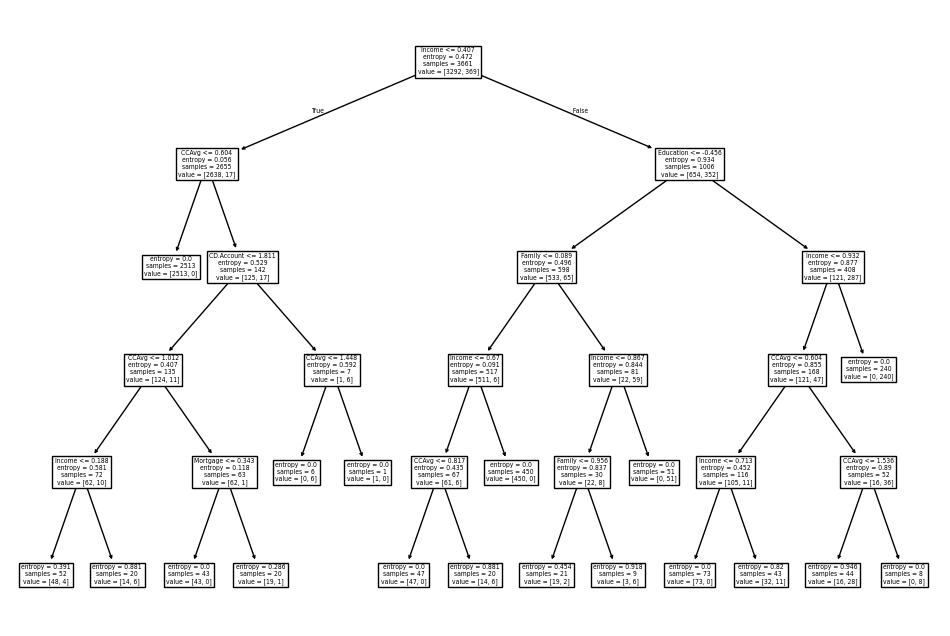

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_model.fit(X_train, y_train), feature_names = X.columns)